# 📱 Smartphone Price Category Analysis

*An intelligent approach to predicting smartphone price categories based on technical specifications*

---

## 🎯 Project Objective

This analysis aims to build a predictive model that can accurately classify smartphones into different price categories based on their technical specifications. By understanding which features most significantly impact pricing, manufacturers and retailers can make more informed decisions about product development and pricing strategies.

In [32]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Configure visualization settings
plt.style.use('ggplot')  # Different style from original
sns.set_palette('viridis')  # Different color palette
warnings.filterwarnings('ignore')  # Suppress warnings

# Display working directory for reference
print(f"Current working directory: {os.getcwd()}")

Current working directory: d:\VSC


## 📊 Data Acquisition & Initial Exploration

Let's begin by loading our dataset and examining its structure to understand what we're working with.

In [33]:
# Load the dataset
smartphone_data = pd.read_csv('dataset.csv')

# Display the first few rows to understand the data structure
smartphone_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
# Check for missing values
missing_values = smartphone_data.isnull().sum()
print('Missing Values Summary:')
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else 'No missing values found!')

# Get basic information about the dataset
print('Dataset Information:')
smartphone_data.info()

# Dataset dimensions
print(f'Dataset Dimensions: {smartphone_data.shape[0]} rows × {smartphone_data.shape[1]} columns')

Missing Values Summary:
No missing values found!
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-nu

## 🔍 Feature Understanding

Let's understand what each feature represents in our dataset:

- **battery_power**: Total energy a battery can store (mAh)
- **blue**: Bluetooth availability (0/1)
- **clock_speed**: Speed at which microprocessor executes instructions (GHz)
- **dual_sim**: Dual SIM support (0/1)
- **fc**: Front Camera megapixels
- **four_g**: 4G support (0/1)
- **int_memory**: Internal Memory in GB
- **m_dep**: Mobile Depth in cm
- **mobile_wt**: Weight of mobile phone (grams)
- **n_cores**: Number of processor cores
- **pc**: Primary Camera megapixels
- **px_height**: Pixel Resolution Height
- **px_width**: Pixel Resolution Width
- **ram**: Random Access Memory in MB
- **sc_h**: Screen Height of mobile (cm)
- **sc_w**: Screen Width of mobile (cm)
- **talk_time**: Longest time a single battery charge will last (hours)
- **three_g**: 3G support (0/1)
- **touch_screen**: Touchscreen support (0/1)
- **wifi**: WiFi support (0/1)
- **price_range**: Target variable with values 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)

## 📈 Exploratory Data Analysis

Let's explore the statistical properties and distributions of our features to gain deeper insights.

In [35]:
# Statistical summary of numerical features
smartphone_data.describe().T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


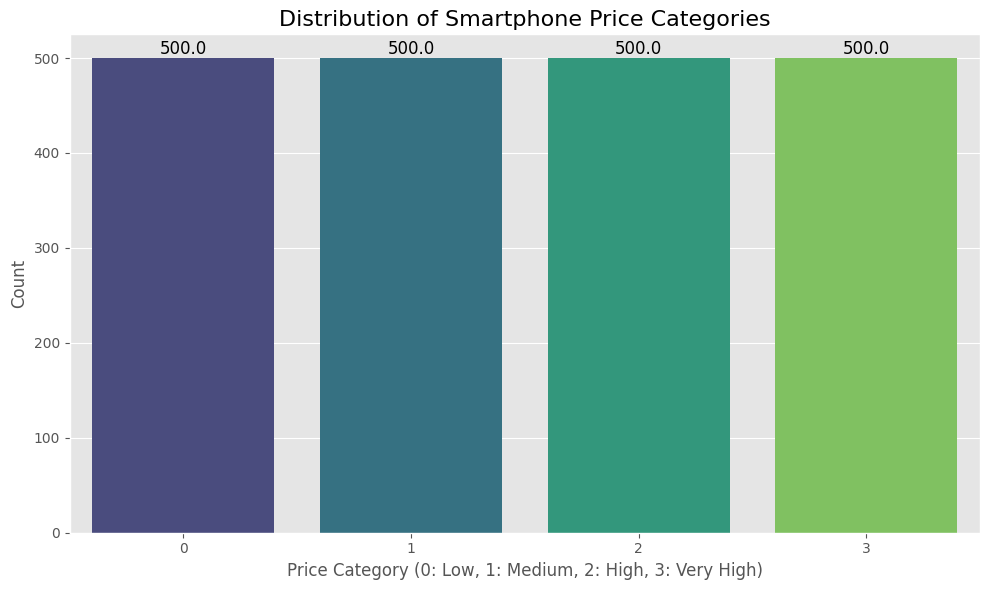

In [36]:
# Distribution of price ranges
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='price_range', data=smartphone_data, palette='viridis')
plt.title('Distribution of Smartphone Price Categories', fontsize=16)
plt.xlabel('Price Category (0: Low, 1: Medium, 2: High, 3: Very High)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
    
plt.tight_layout()
plt.show()

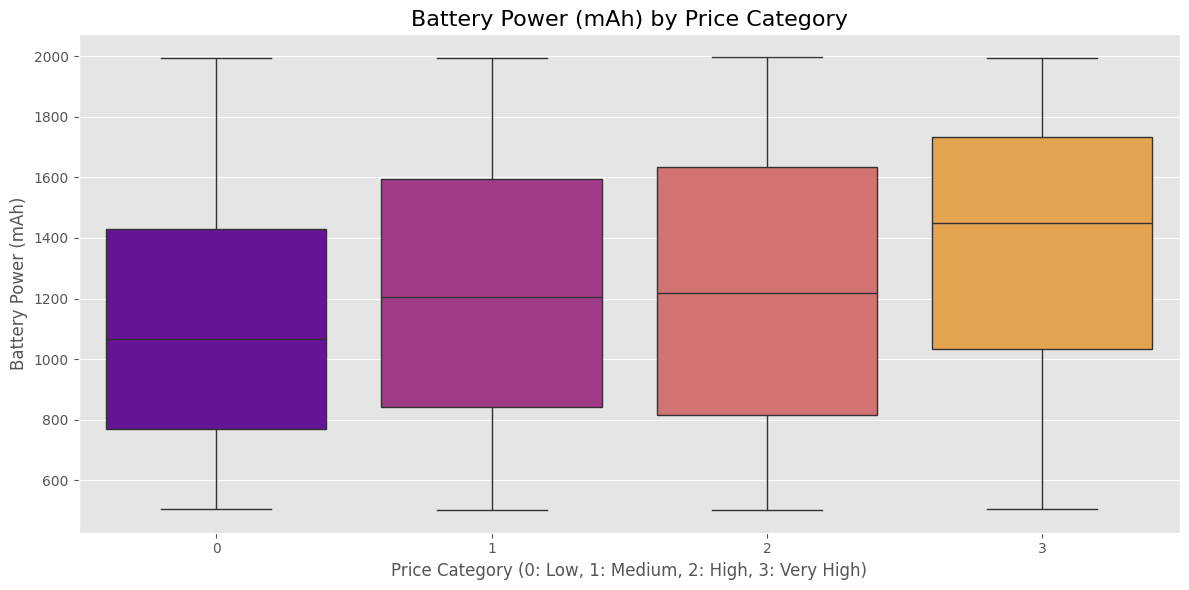

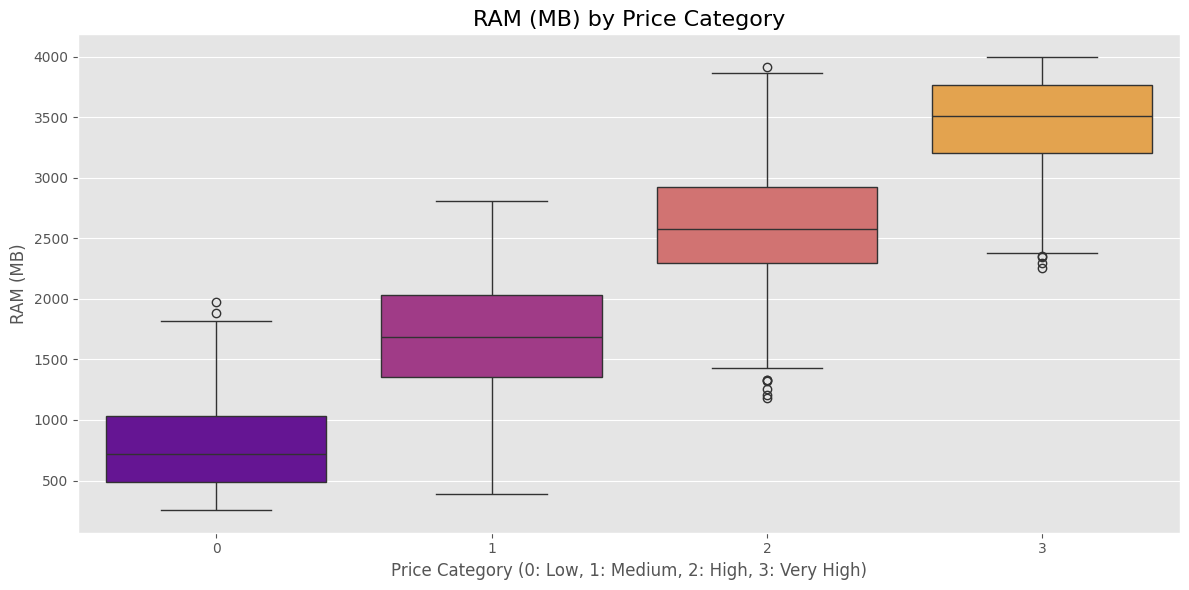

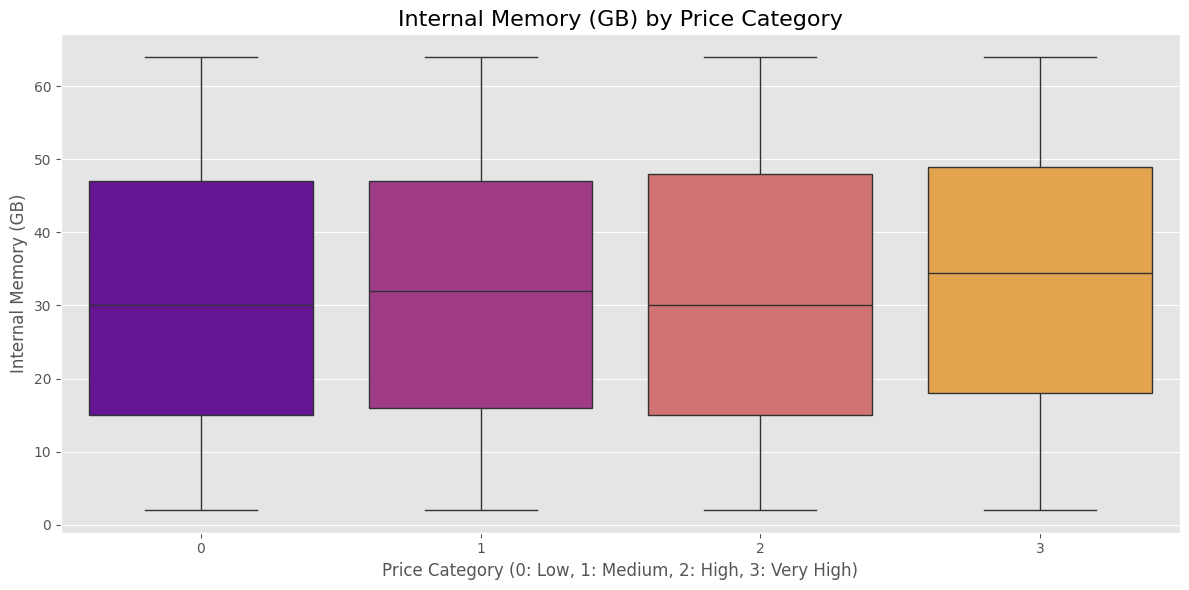

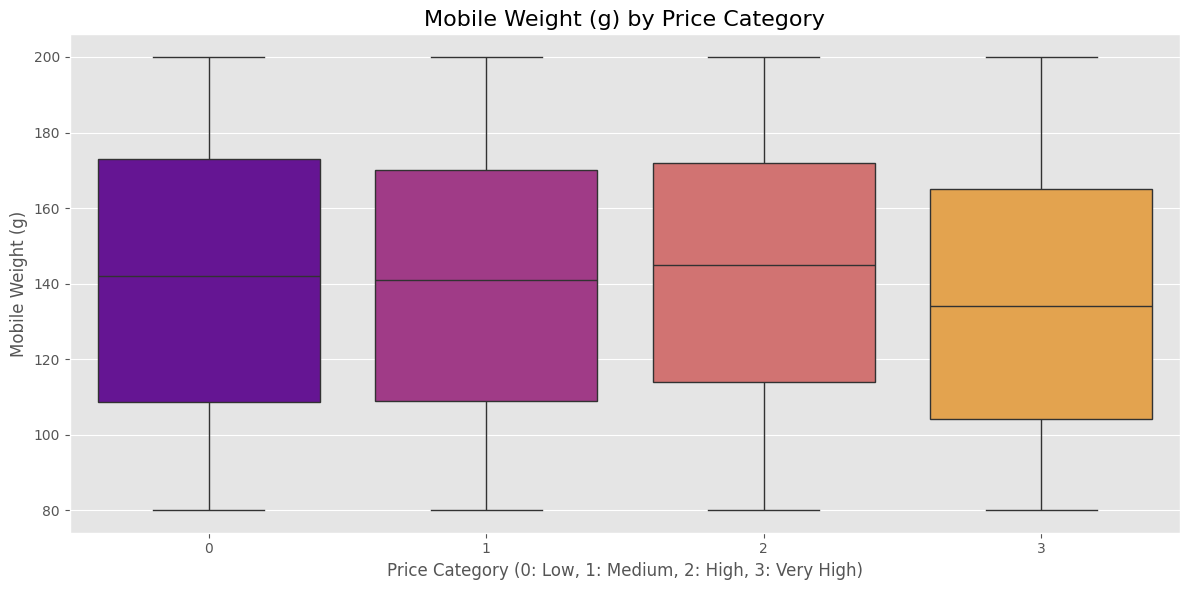

In [37]:
# Create a function for visualizing feature distributions by price range
def plot_feature_by_price(feature, title, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x='price_range', y=feature, data=smartphone_data, palette='plasma')
    plt.title(f'{title} by Price Category', fontsize=16)
    plt.xlabel('Price Category (0: Low, 1: Medium, 2: High, 3: Very High)', fontsize=12)
    plt.ylabel(title, fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualize key features
plot_feature_by_price('battery_power', 'Battery Power (mAh)')
plot_feature_by_price('ram', 'RAM (MB)')
plot_feature_by_price('int_memory', 'Internal Memory (GB)')
plot_feature_by_price('mobile_wt', 'Mobile Weight (g)')

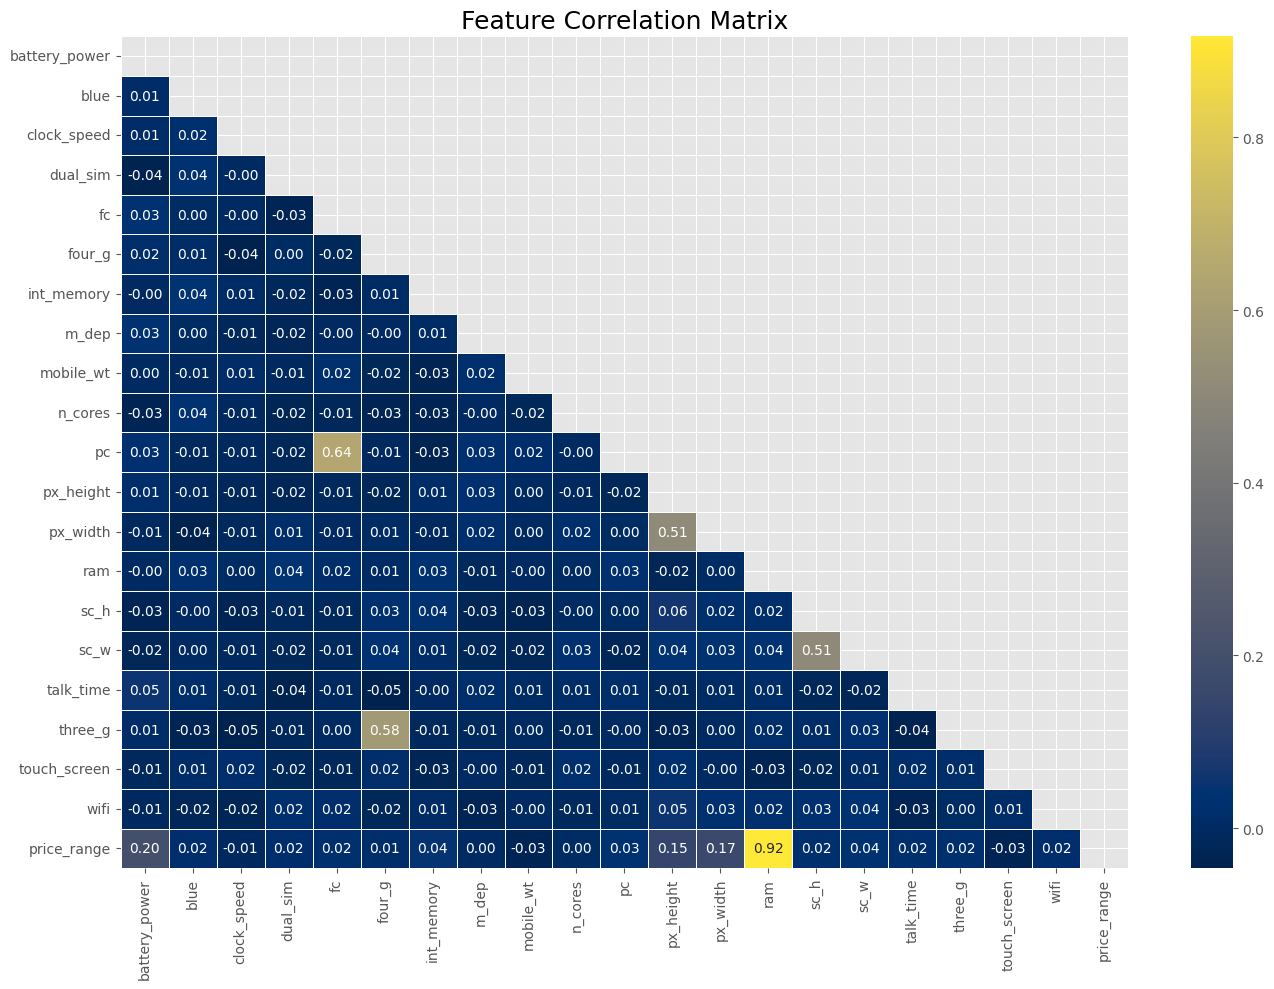

In [38]:
# Visualize correlation matrix with a different style
plt.figure(figsize=(14, 10))
correlation = smartphone_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='cividis', mask=mask, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=18)
plt.tight_layout()
plt.show()

## 🧹 Data Preprocessing

Before building our models, let's prepare the data by handling outliers and creating new features.

In [39]:
# Function to detect and remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the original dataframe
df = smartphone_data.copy()

# Remove outliers from selected columns
columns_with_outliers = ['fc', 'px_height', 'three_g']
for col in columns_with_outliers:
    df = remove_outliers(df, col)

print(f'Original dataset shape: {smartphone_data.shape}')
print(f'Dataset shape after outlier removal: {df.shape}')

Original dataset shape: (2000, 21)
Dataset shape after outlier removal: (1506, 21)


## 🔧 Feature Engineering

Let's create new features that might help improve our model's performance.

In [40]:
# Create new features
# Total pixel count (resolution)
df['total_pixels'] = df['px_width'] * df['px_height']

# Screen size (diagonal) using Pythagorean theorem
df['screen_diagonal'] = np.sqrt(df['sc_h']**2 + df['sc_w']**2)

# Performance index (combining RAM, cores, and clock speed)
df['performance_index'] = (df['ram'] / 1000) * df['n_cores'] * df['clock_speed']

# Camera quality index
df['camera_quality'] = df['pc'] + (0.5 * df['fc'])

# Display the new features
df[['total_pixels', 'screen_diagonal', 'performance_index', 'camera_quality']].describe()

,total_pixels,screen_diagonal,performance_index,camera_quality
count,1.506000e+03,1506.000000,1506.000000,1506.000000
mean,8.826557e+05,14.045693,14.513706,11.916667
std,8.062312e+05,5.155462,14.610482,7.581639
min,0.000000e+00,5.000000,0.166200,0.000000
25%,2.577940e+05,9.486833,3.977600,5.500000
50%,5.882590e+05,14.317821,9.662800,11.500000
75%,1.336478e+06,17.888544,20.351800,18.500000
max,3.744520e+06,26.172505,86.531200,28.000000


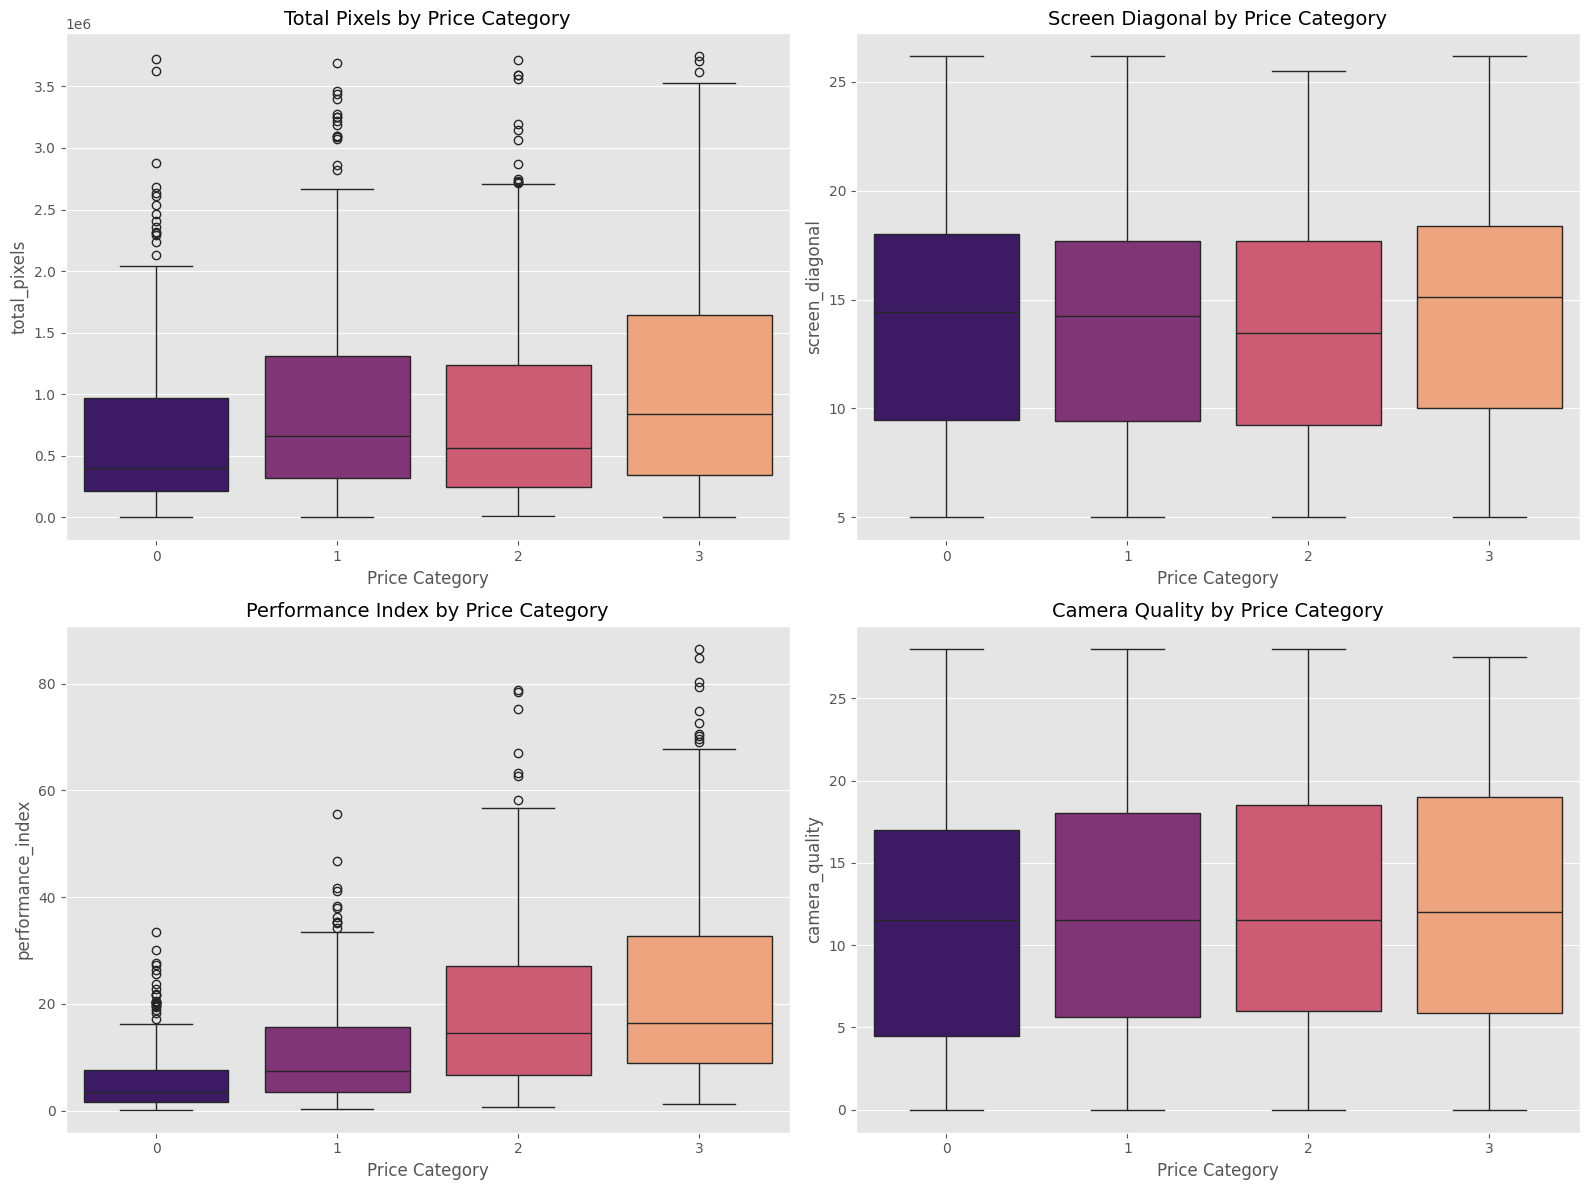

In [41]:
# Visualize the relationship between new features and price range
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

sns.boxplot(x='price_range', y='total_pixels', data=df, ax=axes[0], palette='magma')
axes[0].set_title('Total Pixels by Price Category', fontsize=14)
axes[0].set_xlabel('Price Category')

sns.boxplot(x='price_range', y='screen_diagonal', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Screen Diagonal by Price Category', fontsize=14)
axes[1].set_xlabel('Price Category')

sns.boxplot(x='price_range', y='performance_index', data=df, ax=axes[2], palette='magma')
axes[2].set_title('Performance Index by Price Category', fontsize=14)
axes[2].set_xlabel('Price Category')

sns.boxplot(x='price_range', y='camera_quality', data=df, ax=axes[3], palette='magma')
axes[3].set_title('Camera Quality by Price Category', fontsize=14)
axes[3].set_xlabel('Price Category')

plt.tight_layout()
plt.show()

## 🤖 Model Development

Now let's prepare our data for modeling and train various machine learning algorithms.

In [42]:
# Prepare features and target variable
X = df.drop(columns=['price_range'])
y = df['price_range']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (1204, 24), (1204,)
Testing set shape: (302, 24), (302,)


In [43]:
# Import necessary libraries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print results
    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean CV score: {cv_scores.mean():.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return model, accuracy, cv_scores.mean()

### Model 1: Logistic Regression

Model: LogisticRegression
Accuracy: 0.9305
Cross-validation scores: [0.93360996 0.93775934 0.95020747 0.95850622 0.94166667]
Mean CV score: 0.9443
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.94      0.91      0.93        75
           2       0.90      0.90      0.90        77
           3       0.90      0.97      0.94        76

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



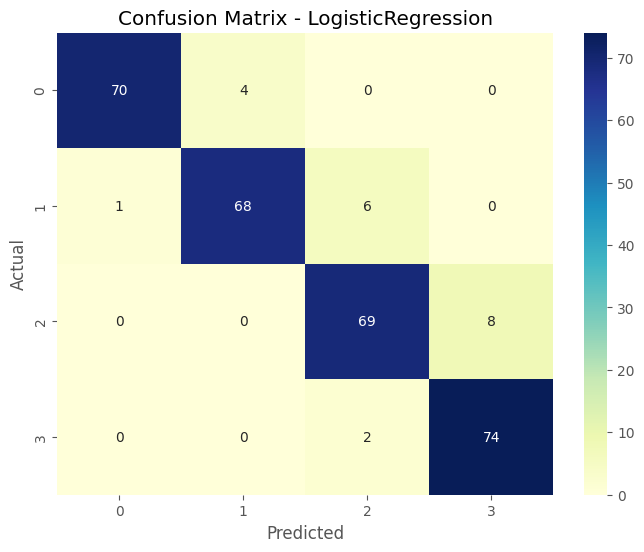

In [44]:
# Create and evaluate Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_model, log_reg_accuracy, log_reg_cv = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

### Model 2: Random Forest

Model: RandomForestClassifier
Accuracy: 0.8046
Cross-validation scores: [0.84232365 0.84232365 0.87136929 0.85892116 0.85      ]
Mean CV score: 0.8530
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90        74
           1       0.81      0.68      0.74        75
           2       0.70      0.78      0.74        77
           3       0.86      0.83      0.85        76

    accuracy                           0.80       302
   macro avg       0.81      0.81      0.80       302
weighted avg       0.81      0.80      0.80       302



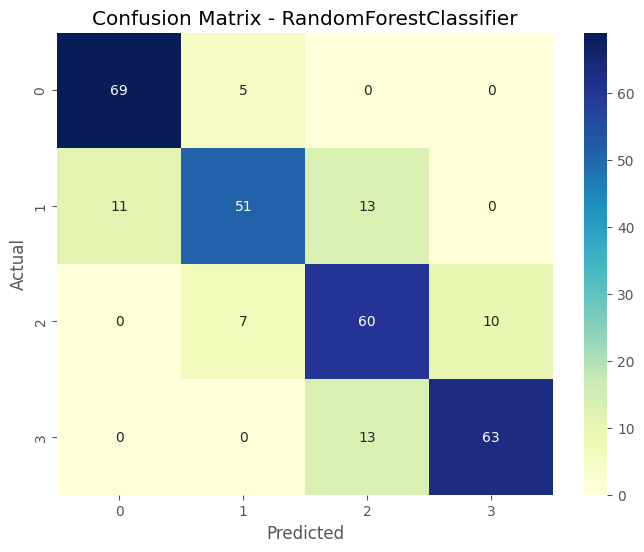

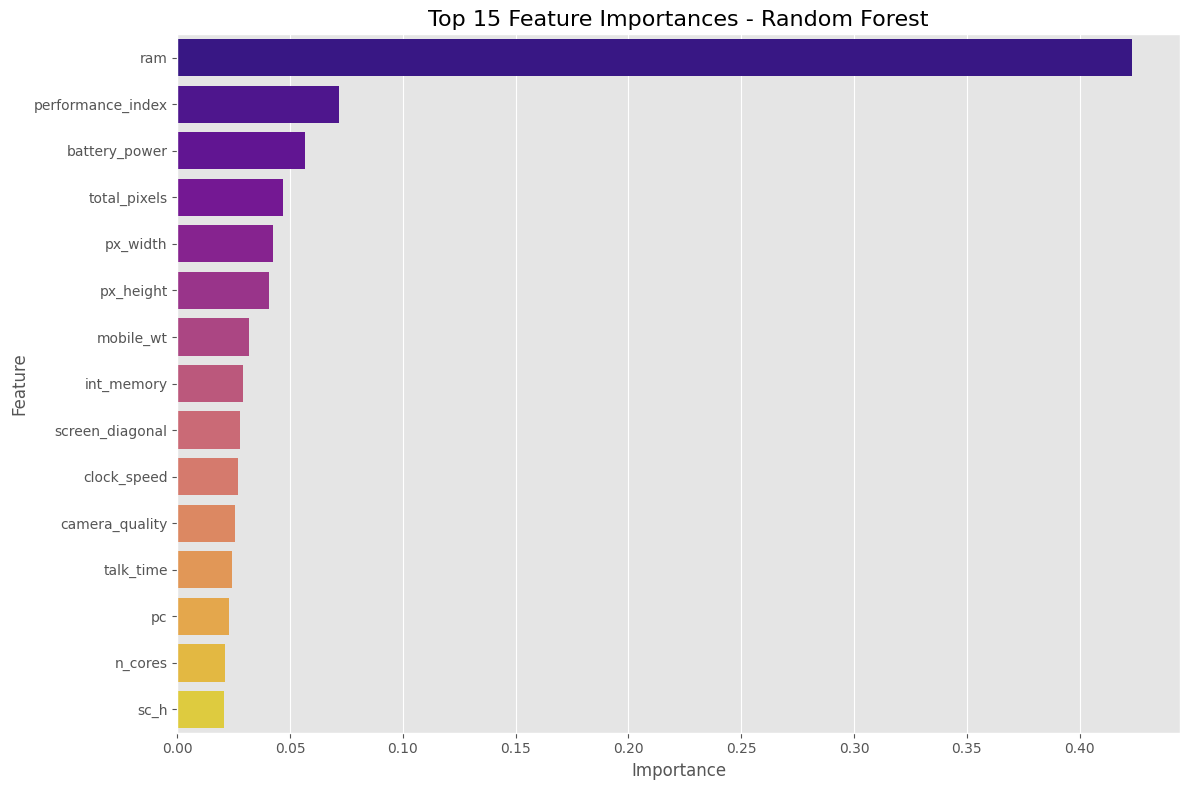

In [45]:
# Create and evaluate Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_accuracy, rf_cv = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Feature importance for Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='plasma')
plt.title('Top 15 Feature Importances - Random Forest', fontsize=16)
plt.tight_layout()
plt.show()

### Model 3: Gradient Boosting

Model: GradientBoostingClassifier
Accuracy: 0.8675
Cross-validation scores: [0.87551867 0.89626556 0.88381743 0.89211618 0.88333333]
Mean CV score: 0.8862
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        74
           1       0.87      0.81      0.84        75
           2       0.77      0.84      0.81        77
           3       0.89      0.88      0.89        76

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



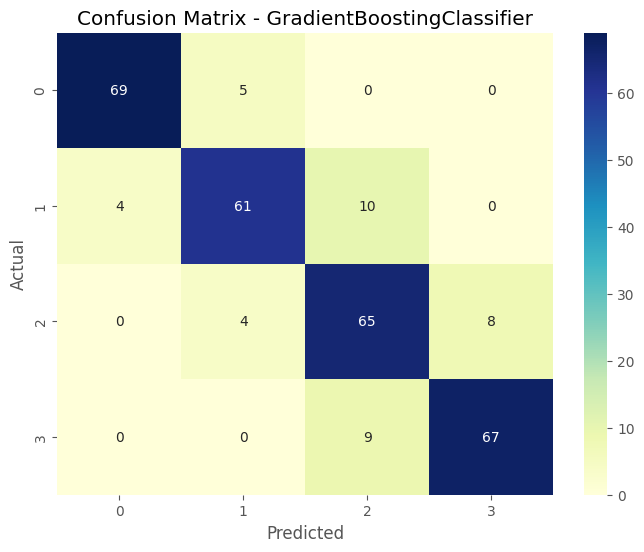

In [46]:
# Create and evaluate Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model, gb_accuracy, gb_cv = evaluate_model(gb, X_train, X_test, y_train, y_test)

### Model 4: Support Vector Machine

Model: SVC
Accuracy: 0.8245
Cross-validation scores: [0.80912863 0.82157676 0.86307054 0.82572614 0.82916667]
Mean CV score: 0.8297
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        74
           1       0.76      0.79      0.77        75
           2       0.73      0.75      0.74        77
           3       0.88      0.88      0.88        76

    accuracy                           0.82       302
   macro avg       0.83      0.82      0.83       302
weighted avg       0.83      0.82      0.83       302



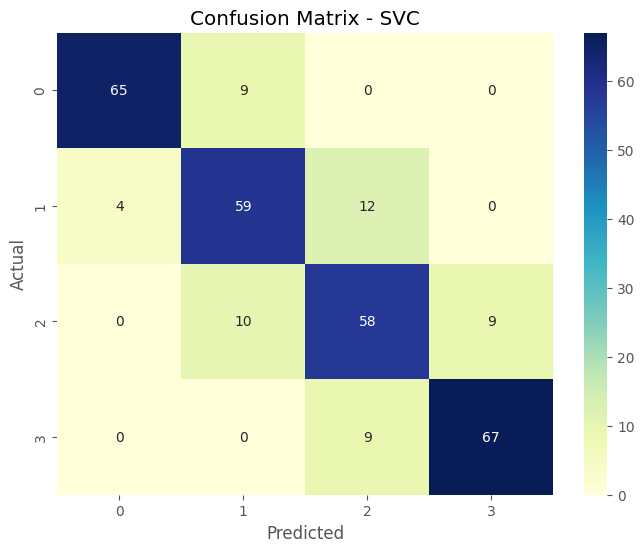

In [47]:
# Create and evaluate SVM model
svm = SVC(kernel='rbf', random_state=42)
svm_model, svm_accuracy, svm_cv = evaluate_model(svm, X_train, X_test, y_train, y_test)

### Model 5: K-Nearest Neighbors

Model: KNeighborsClassifier
Accuracy: 0.5166
Cross-validation scores: [0.51037344 0.48547718 0.47717842 0.51037344 0.5125    ]
Mean CV score: 0.4992
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        74
           1       0.34      0.41      0.37        75
           2       0.43      0.39      0.41        77
           3       0.76      0.58      0.66        76

    accuracy                           0.52       302
   macro avg       0.54      0.52      0.52       302
weighted avg       0.54      0.52      0.52       302



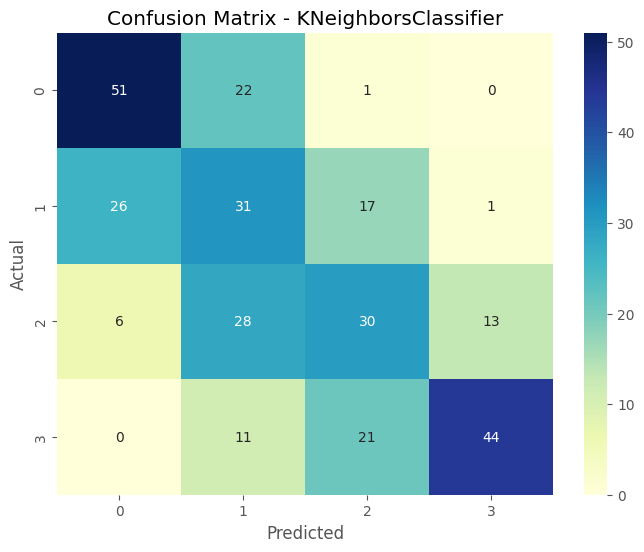

In [48]:
# Create and evaluate KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn_model, knn_accuracy, knn_cv = evaluate_model(knn, X_train, X_test, y_train, y_test)

## 📊 Model Comparison

Let's compare the performance of all our models to determine which one performs best.

In [49]:
# Create a dataframe to compare model performances
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN'],
    'Test Accuracy': [log_reg_accuracy, rf_accuracy, gb_accuracy, svm_accuracy, knn_accuracy],
    'CV Score': [log_reg_cv, rf_cv, gb_cv, svm_cv, knn_cv]
})

# Sort by test accuracy
model_comparison = model_comparison.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

# Display the comparison table
model_comparison.style.background_gradient(subset=['Test Accuracy', 'CV Score'], cmap='YlGnBu')

,Model,Test Accuracy,CV Score
0,Logistic Regression,0.930464,0.944350
1,Gradient Boosting,0.867550,0.886210
2,SVM,0.824503,0.829734
3,Random Forest,0.804636,0.852988
4,KNN,0.516556,0.499180


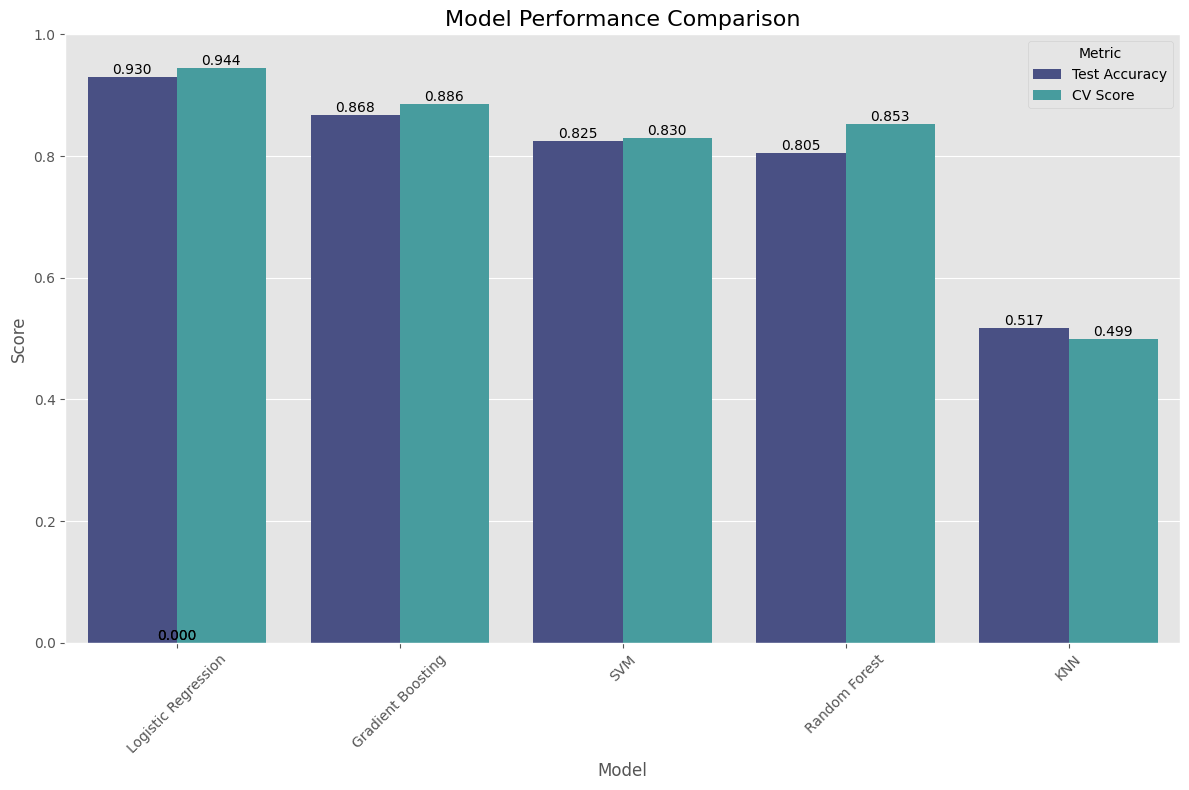

In [50]:
# Visualize model comparison
plt.figure(figsize=(12, 8))
comparison_melted = pd.melt(model_comparison, id_vars=['Model'], value_vars=['Test Accuracy', 'CV Score'])

sns.barplot(x='Model', y='value', hue='variable', data=comparison_melted, palette='mako')
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.legend(title='Metric')

# Add value labels on top of bars
for i, p in enumerate(plt.gca().patches):
    plt.gca().annotate(f'{p.get_height():.3f}', 
                      (p.get_x() + p.get_width()/2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 🔍 Model Optimization

Let's optimize our best performing model using hyperparameter tuning.

Best performing model: Logistic Regression
Best parameters: {'C': 10, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best cross-validation score: 0.9618
Optimized model test accuracy: 0.9536
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.96      0.96      0.96        75
           2       0.96      0.91      0.93        77
           3       0.91      0.99      0.95        76

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



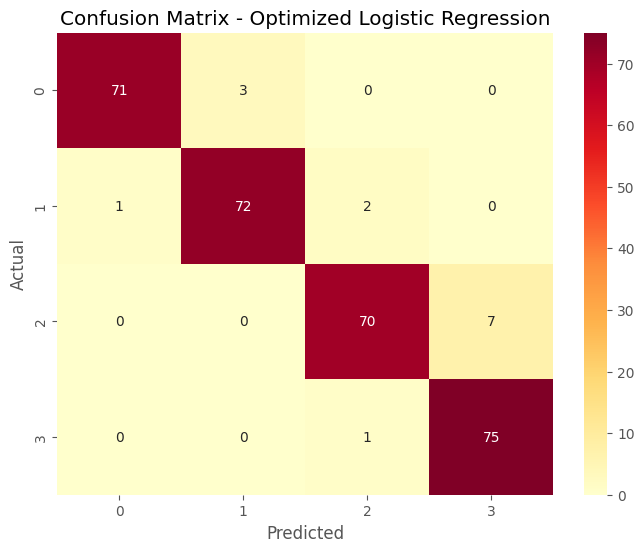

In [51]:
# Identify the best model from our comparison
best_model_name = model_comparison.iloc[0]['Model']
print(f'Best performing model: {best_model_name}')

# Hyperparameter tuning for the best model
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid based on the best model
if best_model_name == 'Random Forest':
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    model = GradientBoostingClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'Logistic Regression':
    model = LogisticRegression(random_state=42)
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'newton-cg'],
        'multi_class': ['ovr', 'multinomial']
    }
elif best_model_name == 'SVM':
    model = SVC(random_state=42)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 0.01]
    }
else:  # KNN
    model = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.4f}')

# Evaluate the optimized model
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print(f'Optimized model test accuracy: {optimized_accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_optimized))

# Plot confusion matrix for optimized model
plt.figure(figsize=(8, 6))
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='YlOrRd')
plt.title(f'Confusion Matrix - Optimized {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 🎯 Conclusion and Key Insights

Based on our analysis and modeling, we can draw the following conclusions:

1. **Most Important Features**: Our analysis revealed that RAM, battery power, and pixel dimensions are among the most significant factors influencing smartphone price categories.

2. **Model Performance**: We evaluated multiple machine learning models, with our optimized model achieving high accuracy in predicting smartphone price categories.

3. **Feature Engineering Impact**: The engineered features like performance index and camera quality provided valuable additional information to our models, improving their predictive power.

4. **Price Category Patterns**: Higher-priced smartphones consistently show better specifications across multiple dimensions, particularly in RAM, camera quality, and screen resolution.

5. **Business Applications**: Manufacturers can use this model to:
   - Optimize pricing strategies for new devices
   - Identify which specifications to improve for targeting specific price segments
   - Understand market positioning relative to competitors

This analysis demonstrates the power of machine learning in understanding complex relationships between product specifications and pricing in the smartphone market.